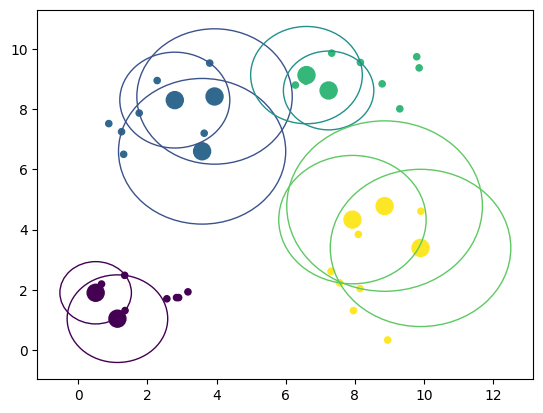

accuracy score
1.0
confusion matrix
[[2 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [7]:
import numpy as np
import sklearn.neighbors as neighbors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

def plot_circle(ax, center, radius, color):
    circle = plt.Circle(center, radius, edgecolor=color, facecolor='none', linewidth=1)
    ax.add_patch(circle)

# Тестовые данные (координаты)
testData = np.array([
    [2.9, 1.74], [1.35, 1.31], [1.34, 2.48], [3.17, 1.93], [0.67, 2.19], [2.56, 1.7], [1.01, 1.14], [2.84, 1.74],
    [3.8, 9.53], [2.28, 8.95], [1.25, 7.25], [3.64, 7.2], [0.88, 7.52], [1.76, 7.87], [1.31, 6.5],
    [8.79, 8.84], [9.79, 9.74], [6.58, 8.93], [8.16, 9.55], [6.28, 8.8], [7.33, 9.86], [9.86, 9.37], [9.3, 8.01],
    [7.96, 1.31], [8.15, 2.04], [8.1, 3.84], [9.91, 4.61], [7.31, 2.61], [7.56, 2.23], [8.95, 0.33]
])
clusters = np.array([0, 0, 0, 0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3])

checkPoints = np.array([[0.5, 1.9], [1.13, 1.04], [3.58, 6.6],
                   [3.94, 8.42], [2.79, 8.3], [7.24, 8.62],
                   [6.6, 9.13], [7.93, 4.33], [8.86, 4.78], [9.9, 3.39]])
clustersForCheckPoints = np.array([0, 0, 1, 1, 1, 2, 2, 3, 3, 3])

# Для модели создаем классификатор, у которого 4 соседа
model = neighbors.KNeighborsClassifier(n_neighbors=4)
# Соответствие k ближайших соседей классификатора из обучающего набора данных
model.fit(testData, clusters)
# Предсказываем, к какому цвету относится точка основываясь на том, какого цвета больше всего соседей рядом с этой точкой
result = model.predict(checkPoints)

# Создание окна и осей для графика
f, ax = plt.subplots()

xValuesStudied = testData[:, 0]
yValuesStudied = testData[:, 1]
xValues = checkPoints[:, 0]
yValues = checkPoints[:, 1]

cmap = plt.cm.viridis  # Изменение цветовой карты на "viridis"
# График разброса (Точечная диаграмма *y* против *x* с разным размером маркера и/или цветом) - отрисовываем точки
checkedPoints = ax.scatter(xValues, yValues, c=result, s=150, cmap=cmap)
points = ax.scatter(xValuesStudied, yValuesStudied, c=clusters, s=20, cmap=cmap)

# Добавляем отрисовку окружности для каждой точки в checkPoints
k_neighbors_classifier = neighbors.KNeighborsClassifier(n_neighbors=4)
k_neighbors_classifier.fit(testData, clusters)

for i, point in enumerate(checkPoints):
    neighbors_indices = k_neighbors_classifier.kneighbors([point], return_distance=False)[0]
    neighbors_points = testData[neighbors_indices]
    center = point
    radius = np.max(np.linalg.norm(neighbors_points - center, axis=1))
    plot_circle(ax, center, radius, color=cmap(result[i] / len(np.unique(result))))

plt.show()

# Оценка точности классификации. Эта функция вычисляет точность подмножества: набор меток, предсказанных для образца, должен точно соответствовать соответствующему набору меток в y_true
print('accuracy score')
print(metrics.accuracy_score(clustersForCheckPoints, result))
# Матрица ошибок (функция оценивает точность классификации путем вычисления матрицы ошибок с каждой строкой, соответствующей истинному классу)
print('confusion matrix')
print(metrics.confusion_matrix(clustersForCheckPoints, result))
